#### __POSTTEST 6 KECERDASAN BUATAN__
#### Nama : Puput Widyastuti
#### Nim  : 2109106074
#### Kelas: Informatika B121

In [1]:
#untuk mengimpor library yang diperlukan
import pandas as pd                          #Mengimpor library Pandas 
import matplotlib.pyplot as plt              #Mengimpor library matplotlib 
import numpy as np                           #Mengimpor library numpy 
import tensorflow as tf                      #Mengimpor library tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers, optimizers, datasets
from sklearn.preprocessing import OneHotEncoder             
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, accuracy_score

#untuk membaca dataset
df=pd.read_csv('Global Missing Migrants Dataset.csv')

#### Melakukan Preprocessing

**Menghapus kolom yang tidak diperlukan**

In [2]:
# Menghapus kolom Migration route 
df = df.drop(columns=['Migration route'])
# Menghapus kolom 'Cause of Death '
df = df.drop(columns=['Cause of Death'])
# Menghapus kolom Location of death 
df = df.drop(columns=['Location of death'])
# Menghapus kolom Information Source  
df = df.drop(columns=['Information Source'])
# Menghapus kolom UNSD Geographical Grouping
df = df.drop(columns=['UNSD Geographical Grouping'])
# Menghapus kolom Coordinates
df = df.drop(columns=['Coordinates'])

**Data Cleaning**

In [3]:
#CEK NILAI NULL DALAM DATASET
df.isna().sum()

Incident Type                            0
Incident year                            0
Reported Month                           0
Region of Origin                        22
Region of Incident                       0
Country of Origin                        8
Number of Dead                         550
Minimum Estimated Number of Missing      0
Total Number of Dead and Missing         0
Number of Survivors                      0
Number of Females                        0
Number of Males                          0
Number of Children                       0
dtype: int64

In [ ]:
#kolom untuk tipe data bilangan bulat
kol_int = ['Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing',	'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']

#perulangan untuk mengecek nilai null setiap kolom 'int', dan akan diganti menggunakan strategi 'median'
for kolom in kol_int:
    if df[kolom].dtype == 'int64':
        median_value = df[kolom].median()
        df[kolom].fillna(median_value, inplace=True)
    else:
        mode_value = df[kolom].mode().iloc[0]
        df[kolom].fillna(mode_value, inplace=True)
# Kolom tipe data string
kol_string = ['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin', 'Region of Incident', 'Country of Origin', ]
#perulangan untuk mengecek nilai null setiap kolom bernilai 'object', dan akan diganti menggunakan strategi 'mean'
for kolom in kol_string:
    if df[kolom].dtype == 'object':
        mode_value = df[kolom].mode().iloc[0]
        df[kolom].fillna(mode_value, inplace=True)
        
print('*' * 80)
print(df)
print('*' * 65)
print('*' * 65)

In [5]:
print(df.isna().sum())

Incident Type                          0
Incident year                          0
Reported Month                         0
Region of Origin                       0
Region of Incident                     0
Country of Origin                      0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
dtype: int64


**Periksa Duplikat Data**

In [6]:
jmlh_duplikat = df.duplicated().sum()
print('===================================')
print(f"Jumlah Duplikat Saat Ini : {jmlh_duplikat}")
print('===================================')

Jumlah Duplikat Saat Ini : 5622


**Menghapus duplikat data**

In [7]:
# untuk menghapus duplikat berdasarkan semua kolom
df.drop_duplicates(inplace=True)
jmlh_duplikat_hps = df.duplicated().sum()
print('===================================')
print(f"Jumlah Duplikat setelah DiHapus: {jmlh_duplikat_hps}")
print('===================================')

Jumlah Duplikat setelah DiHapus: 0


In [9]:
total_data = df.shape[0]  # Jumlah baris
total_kolom = df.shape[1]  # Jumlah kolom
print('===================================')
print(f"      Jumlah total data: {total_data}")
print('===================================')

      Jumlah total data: 7398


In [10]:
# untuk melakukan pemotongan (subsampling) dari DataFrame df sesuai keinginan
n = 4000 #jumlah data yang diinginkan
if len(df)>n:
    random_indices = np.random.choice(len(df), n, replace=False)
    df=df.iloc[random_indices]
df

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
2491,Incident,2017,January,Unknown,Mediterranean,Unknown,10.0,0,10,0,1,8,1
4106,Incident,2018,April,Central America,North America,Honduras,1.0,0,1,0,0,1,0
206,Incident,2014,September,Western Asia,Western Asia,Syrian Arab Republic,1.0,0,1,0,0,1,1
10426,Incident,2022,March,Sub-Saharan Africa,Mediterranean,Unknown,1.0,24,24,0,0,0,0
3759,Incident,2018,January,Sub-Saharan Africa (P),Western Africa,Unknown,1.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,Incident,2018,December,Central America,North America,Guatemala,1.0,0,1,0,0,0,1
8544,Split Incident,2021,February,Middle Africa,Mediterranean,"Chad,Unknown",2.0,3,5,47,0,2,0
10593,Incident,2022,March,Caribbean,Caribbean,Cuba,1.0,0,1,0,1,0,0
11004,Split Incident,2022,June,Central America,North America,"Guatemala,Honduras,Mexico",53.0,0,53,0,13,40,6


## Sequential Model

In [12]:
#membuat sebuah objek model sequential
model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),  #lapisan pertama dalam model
    layers.Dense(8, activation='relu'),                     #lapisan kedua dalam model
    layers.Dense(1, activation='linear'),                   #lapisan ketiga dalam model 
])
#untuk menampilkan summary tiap model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#mengkonfigurasi model deep learning sebelum pelatihan
model.compile( optimizer='adam', loss='mean_squared_error',  metrics=['mean_absolute_error', 'mean_squared_error'])

In [14]:
#menentukan kolom yang akan digunakan
migrants_X, migrants_y = df[['Number of Males']], df['Number of Dead']

#membagi dataset menjadi 2, yaitu : data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    migrants_X, migrants_y, test_size=0.2, random_state=42
)

**melatih & mengevaluasi**

In [20]:
#untuk melatih model neural network dengan data pelatihan
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
#untuk mengevaluasi model
loss, mae, mse = model.evaluate(X_test, y_test)
print('===================================================')
print(f'   Mean Absolute Error (MAE) : {mae}')
print(f'   Mean Squared Error (MSE)  : {mse}')
print('===================================================')

Epoch 1/10
100/100 [==============================] - 1s 7ms/step - loss: 71.2071 - mean_absolute_error: 3.2731 - mean_squared_error: 71.2071 - val_loss: 72.1899 - val_mean_absolute_error: 3.2090 - val_mean_squared_error: 72.1899
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 71.2573 - mean_absolute_error: 3.2083 - mean_squared_error: 71.2573 - val_loss: 72.0209 - val_mean_absolute_error: 3.1977 - val_mean_squared_error: 72.0209
Epoch 3/10
100/100 [==============================] - 1s 5ms/step - loss: 71.3520 - mean_absolute_error: 3.2109 - mean_squared_error: 71.3520 - val_loss: 72.1887 - val_mean_absolute_error: 3.2440 - val_mean_squared_error: 72.1887
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 71.3709 - mean_absolute_error: 3.2437 - mean_squared_error: 71.3709 - val_loss: 72.4723 - val_mean_absolute_error: 3.2789 - val_mean_squared_error: 72.4723
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 71.302

**Menggunakan r2_score (R2)**

In [16]:
# Prediksi model
y_pred = model.predict(X_test)

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

25/25 [==============================] - 0s 4ms/step
R-squared (R2): -0.032364726433931734


In [17]:
#untuk mengambil beberapa metrik evaluasi dan nilai loss dari riwayat pelatihan model
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

# Ambil loss dari riwayat pelatihan model
loss = history.history['loss']
val_loss = history.history['val_loss']


**Grafik Pergerakan Loss & Metrics**

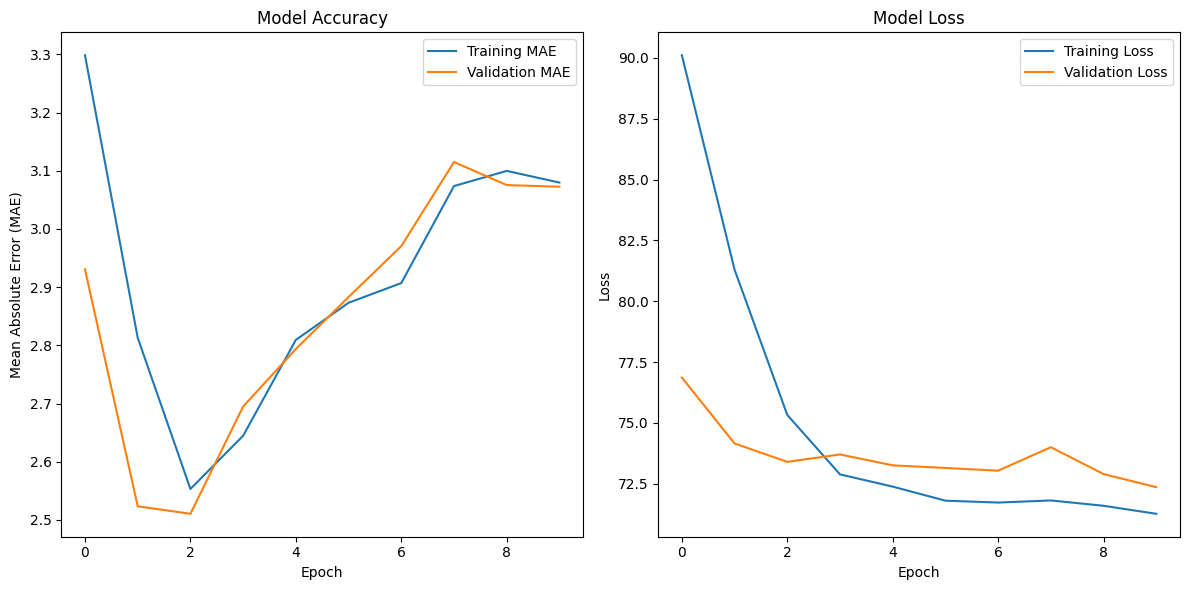

In [18]:
#untuk membuat grafik model accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Model Accuracy')

#untuk membuat grafik model loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
#untuk menampilkan grafik
plt.tight_layout()
plt.show()